In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# importing data
url = "http://bit.ly/w-data"
data = pd.read_csv("student_info.csv")
data.head(10)

,Hours,Scores
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [23]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [24]:
data.isnull().sum()

Hours     5
Scores    0
dtype: int64

In [25]:
s_data = data.dropna()

s_data

,Hours,Scores
0,6.83,78.50
1,6.56,76.74
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [26]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

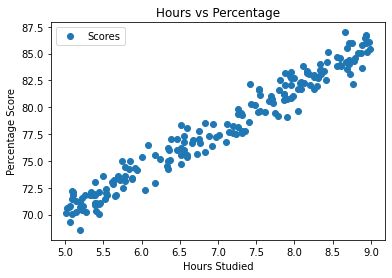

In [27]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

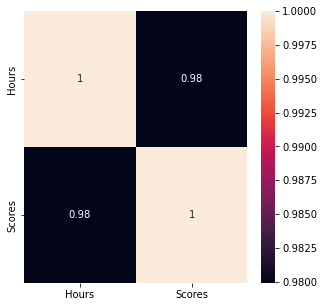

In [28]:
#correlation plot
plt.figure(figsize=(5,5))
correlation_matrix = s_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [29]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


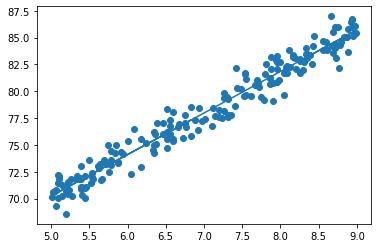

In [32]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [33]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.63]
 [7.9 ]
 [7.1 ]
 [5.4 ]
 [5.39]
 [8.71]
 [5.07]
 [6.38]
 [5.11]
 [7.67]
 [5.19]
 [6.67]
 [6.33]
 [5.38]
 [5.39]
 [8.05]
 [7.14]
 [6.35]
 [7.01]
 [8.95]
 [5.39]
 [5.79]
 [8.6 ]
 [8.2 ]
 [5.45]
 [8.93]
 [7.95]
 [5.19]
 [7.26]
 [5.01]
 [5.85]
 [7.86]
 [5.07]
 [7.88]
 [7.55]
 [6.66]
 [8.66]
 [5.02]
 [7.87]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,72.87,72.666094
1,80.76,81.458250
2,76.76,78.359693
3,70.34,71.775259
4,71.11,71.736527
5,85.98,84.595539
6,70.79,70.497104
7,77.01,75.570991
8,72.08,70.652032
9,80.58,80.567415


<AxesSubplot:title={'center':'Comaparison between Actual and Predicted Score Values'}>

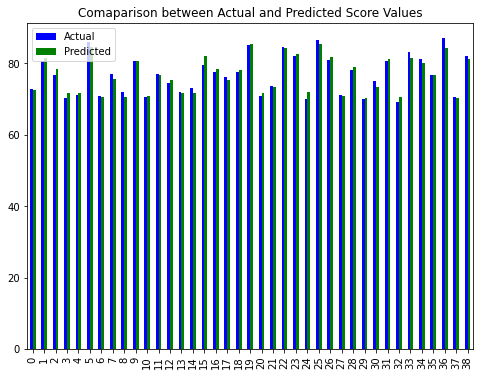

In [35]:
df.plot(kind='bar',figsize=(8,6), color=["Blue", "Green"], title= "Comaparison between Actual and Predicted Score Values")

In [36]:
# Testing on our required data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 86.6870653069947


In [37]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,balanced_accuracy_score


# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coeff of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)


MAE: 0.874366072505091
RMSE: 1.0802918869151659
R-Square: 0.958579064674069


In [38]:
User_input = float(input())
print('Hours: {}'.format(User_input))
print('Predicted Score{}'.format(regressor.predict([[User_input]])))

8
Hours: 8.0
Predicted Score[81.84556962]


In [39]:
import pickle
pickle_out = open('regressor.pickle', 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()